<a href="https://colab.research.google.com/github/shreytanwar/IMDB-sentimental-analysis/blob/main/IMDB_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

import numpy as np

import matplotlib.pyplot as plt

In [2]:
(X_train,Y_train),(X_test, Y_test) = imdb.load_data(num_words = 10000)

In [3]:
print(len(X_train))
print(X_train[0])

25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
vocab = imdb.get_word_index()
# vocab.items = dictionary

In [5]:
rev_vocab = dict( [[value,key] for (key,value) in vocab.items()])

In [6]:
def print_rev(review):
  rev = ' '.join([rev_vocab.get(r - 3, '?') for r in review ])
  return rev

In [7]:
print(print_rev(X_train[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

##Data Vectorisation

In [8]:
def vectorize(sentences, dim = 10000):
  out = np.zeros((len(sentences), dim ))

  for i, idx in enumerate(sentences):
    out[i,idx] = 1

  return out

In [9]:
x_train = vectorize(X_train)
x_test = vectorize(X_test)

In [10]:
x_train.shape

(25000, 10000)

In [11]:
y_train = np.asarray(Y_train).astype('float32')
y_test = np.asarray(Y_test).astype('float32')

##Neural Network

In [12]:
from keras.layers import Dense
from keras.layers import Dropout
from keras. models import Sequential

In [13]:
model = Sequential()

model.add(Dense(16, activation ='relu', input_shape= (10000,)))

model.add(Dropout (rate = 0.25))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(50, activation = "relu"))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                850       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
Total params: 163,416
Trainable params: 163,416
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_valid = x_train[:5000]
x_train_new = x_train[5000:]

y_valid = y_train[:5000]
y_train_new =y_train[5000:]

In [16]:
x_valid.shape

(5000, 10000)

In [17]:
hist = model.fit(x_train_new,y_train_new,batch_size=512,epochs=5,validation_data=(x_valid,y_valid))

Epoch 1/5
40/40 [==============================] - 2s 48ms/step - loss: 3.0736 - accuracy: 0.1209 - val_loss: 1.2694 - val_accuracy: 0.1866
Epoch 2/5
40/40 [==============================] - 1s 31ms/step - loss: 1.2671 - accuracy: 0.0478 - val_loss: 0.7548 - val_accuracy: 0.0086
Epoch 3/5
40/40 [==============================] - 1s 31ms/step - loss: 0.8014 - accuracy: 0.0503 - val_loss: 0.6541 - val_accuracy: 0.0148
Epoch 4/5
40/40 [==============================] - 1s 31ms/step - loss: 0.6473 - accuracy: 0.0268 - val_loss: 0.5446 - val_accuracy: 0.0056
Epoch 5/5
40/40 [==============================] - 1s 30ms/step - loss: 0.5496 - accuracy: 0.0312 - val_loss: 0.4831 - val_accuracy: 0.0368


##Visualize Results

<function matplotlib.pyplot.show>

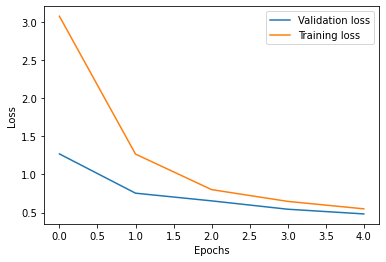

In [18]:
h = hist.history

plt.plot(h['val_loss'], label = 'Validation loss')
plt.plot(h['loss'], label = 'Training loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show

<function matplotlib.pyplot.show>

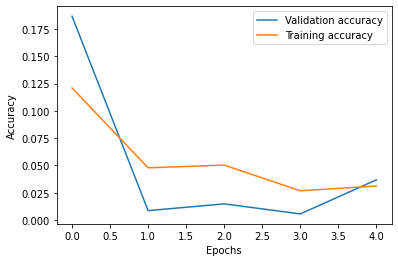

In [19]:
plt.plot(h['val_accuracy'], label = 'Validation accuracy')
plt.plot(h['accuracy'], label = 'Training accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show

In [20]:
model.save('imdb_sa.h5')